In [278]:
import pandas as pd

In [454]:
#Load the Kaggle TrainSet
train_df = pd.read_csv('./Downloads/KaggleData/train.csv')

In [455]:
train_df.shape


(175000, 14)

In [456]:
train_df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos,32027
1,France,"A solid, chunky wine, with a structure that is...",NaN,88.041695,28.0,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,71079
2,France,"This is powerful and concentrated, with the hi...",NaN,94.085021,130.0,Bordeaux,Saint-Émilion,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Figeac,32440
3,US,"Rich, ripe and oaky, this Petite Sirah charms ...",Thompson Vineyard,89.869797,34.0,California,Santa Barbara County,Central Coast,NaN,NaN,Jaffurs 2010 Thompson Vineyard Petite Sirah (S...,PETITE SIRAH,Jaffurs,124405
4,US,This wine is a unique in the state blend and f...,McKinley Springs Vineyard,89.017651,24.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Syncline 2016 McKinley Springs Vineyard Rosé (...,ROSé,Syncline,33649


In [457]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 14 columns):
country                  174953 non-null object
description              175000 non-null object
designation              122734 non-null object
points                   175000 non-null float64
price                    175000 non-null float64
province                 174953 non-null object
region_1                 146466 non-null object
region_2                 75394 non-null object
taster_name              65509 non-null object
taster_twitter_handle    62190 non-null object
title                    82189 non-null object
variety                  174999 non-null object
winery                   175000 non-null object
id                       175000 non-null int64
dtypes: float64(2), int64(1), object(11)
memory usage: 18.7+ MB


In [458]:
#The number of missing values for each columns
train_df.isnull().sum()

country                      47
description                   0
designation               52266
points                        0
price                         0
province                     47
region_1                  28534
region_2                  99606
taster_name              109491
taster_twitter_handle    112810
title                     92811
variety                       1
winery                        0
id                            0
dtype: int64

In [459]:
#Remove no significant values 
#train_df.drop(['region_1','taster_name','taster_twitter_handle','region_2'], axis=1,inplace=True)

First Model with the mean

In [460]:
#Extract the target
price = train_df['price'].values

In [461]:
meanG = price.mean()
meanG

34.3044

In [462]:
#Download the testSet
test_df = pd.read_csv('./Downloads/KaggleData/test.csv')

In [463]:
test_df[['id','price']].head()

,id,price
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN


In [464]:
#Take the mean like our ypred
test_df['price'] = meanG

In [465]:
test_df[['id','price']].head()

,id,price
0,0,34.3044
1,1,34.3044
2,2,34.3044
3,3,34.3044
4,4,34.3044


In [466]:
#Creat
submission = test_df[['id','price']]

In [467]:
#Create the submission file with id and predicted price
submission.to_csv('Kagglecsv',index=False,)

##Second Model with linear regression that used columns 'Points' as feature

In [468]:
import matplotlib.pyplot as plt

In [469]:
points = train_df[['points']].values


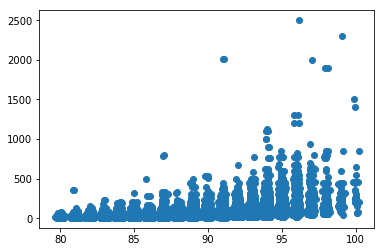

In [470]:
plt.scatter(points,price)

From the above, we notice that most of the data sits below the 1000 price mark. Evidently the rest are outliers, so we can create a set that contains only values below 1000

In [471]:
#create subset dataset that has price less than or eaual 1000
#train_df = train_df[['points','price']]
df_1000 = train_df[ train_df.price <= 1000]
df_1000.shape

(174984, 14)

In [472]:
# Do a description on the dataset to see if it worked and explore other statistical features.
df_1000.describe()

,points,price,id
count,174984.000000,174984.000000,174984.000000
mean,88.083263,34.159803,70685.974946
std,3.156136,35.032526,41341.078236
min,79.636128,4.000000,1.000000
25%,85.971248,16.000000,35025.000000
50%,87.981524,25.000000,70259.500000
75%,90.085443,40.000000,105551.250000
max,100.220603,1000.000000,150929.000000


Now, we are using the sample function to sample the data into 80% train and 20% test

In [473]:
#sample dataset 80% train
_train_df = df_1000.sample(frac=0.8)

#Dump the remaining into validation or test
_valdf = df_1000.drop(_trainset.index)

In [474]:
#Check the SHape
_train_df.shape, _valdf.shape

((139987, 14), (34997, 14))

In [475]:
#Slicing points and price to train and test sets
X_train = _train_df[['points']].values
y_train = _train_df[['price']].values
X_test = _valdf[['points']].values
y_test = _valdf[['price']].values

X_train.shape, y_train.shape,X_test.shape, y_test.shape

((139987, 1), (139987, 1), (34997, 1), (34997, 1))

In [476]:
#Import Linear Regression for training since the task is of continuous output
from sklearn.linear_model import LinearRegression

In [477]:
#Instantiate the LInear Regression class
lr = LinearRegression()

#Train the model on X and y
lr.fit(X_train,y_train)

#prdict on X_test the value of y
ypred = lr.predict(X_test)
ypred.shape

(34997, 1)

In [478]:
#import an error metric to calculate the error
from sklearn.metrics import mean_squared_error
import numpy as np

In [479]:
mse = mean_squared_error(y_test,ypred)

In [480]:
l=np.sqrt(mse)
l

30.9187945359524

In [481]:
#Import the testSet
test_df2 = pd.read_csv('./Downloads/KaggleData/test.csv',index_col=False)
test_df2

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,41855,US,"Sweet new oak stands out, giving this Cabernet...",3D,95.036469,NaN,California,St. Helena,Napa,NaN,NaN,Salvestrin 2007 3D Cabernet Sauvignon (St. Hel...,CABERNET SAUVIGNON,Salvestrin,0
1,10328,France,Charming raspberry aromas intertwine with scen...,Heluicum,90.966405,NaN,Rhône Valley,Collines Rhôdaniennes,NaN,NaN,NaN,NaN,SYRAH,Les Vins de Vienne,1
2,60094,US,"Ripe blackberry, leather and soy show on the n...",Estate,88.964358,NaN,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Brave & Maiden 2013 Estate Cabernet Franc (San...,CABERNET FRANC,Brave & Maiden,2
3,48333,US,White flowers and wild anise give this a crisp...,NaN,89.960356,NaN,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Les Voleurs 2013 Chardonnay (Sonoma Coast),CHARDONNAY,Les Voleurs,3
4,14498,US,Pinot Gris has been making inroads in Washingt...,NaN,88.075501,NaN,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Chateau Ste. Michelle 2015 Pinot Gris (Columbi...,PINOT GRIS,Chateau Ste. Michelle,4
5,91222,US,"An easy, gentle red wine, full-bodied and spic...",NaN,86.118662,NaN,California,Russian River Valley,Sonoma,NaN,NaN,Bearboat 2008 Syrah (Russian River Valley),SYRAH,Bearboat,5
6,126792,Argentina,Red berry fruit with touches of vanilla and sp...,Saurus Patagonia,86.054011,NaN,Other,Neuquén,NaN,NaN,NaN,NaN,PINOT NOIR,Familia Schroeder,6
7,50588,US,"Tart, dry and simple, this Cab will happily wa...",NaN,82.964697,NaN,California,California,California Other,NaN,NaN,Montevina 2006 Cabernet Sauvignon (California),CABERNET SAUVIGNON,Montevina,7
8,145901,Italy,"A gorgeous and opulent nose with honey, vanill...",NaN,88.950953,NaN,Northeastern Italy,Trentino,NaN,NaN,NaN,NaN,PINOT GRIGIO,Bollini,8
9,124649,Italy,"Pressed violet, baked plum, baking spice and c...",NaN,90.167277,NaN,Veneto,Amarone della Valpolicella Classico,NaN,Kerin O’Keefe,@kerinokeefe,David Sterza 2011 Amarone della Valpolicella ...,RED BLEND,David Sterza,9


In [504]:
#predict price using the points feature
features_test = test_df2[['points']].values
ypred = lr.predict(features_test)
test_df2['price'] = ypred
features_test.shape



(83210, 1)

In [483]:
#Extract the two columns needed for the competition submission and save as a csv
submission = test_df2[['id','price']]
submission.to_csv('Kagglecsv2_bis',index=False)
submission.head()


,id,price
0,0,70.852624
1,1,49.360101
2,2,38.788023
3,3,44.047526
4,4,34.094296


Now we have done our submission and gotten our score, we will check for other features to use in our training that could improve our models performance 

In [484]:
# Check information on the dataset (below 1000 price dataset)
df_1000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174984 entries, 0 to 174999
Data columns (total 14 columns):
country                  174937 non-null object
description              174984 non-null object
designation              122729 non-null object
points                   174984 non-null float64
price                    174984 non-null float64
province                 174937 non-null object
region_1                 146452 non-null object
region_2                 75392 non-null object
taster_name              65500 non-null object
taster_twitter_handle    62181 non-null object
title                    82180 non-null object
variety                  174983 non-null object
winery                   174984 non-null object
id                       174984 non-null int64
dtypes: float64(2), int64(1), object(11)
memory usage: 25.0+ MB


In [485]:
#We have decide to have a look at the country
df_1000.country.value_counts()

US                        79127
Italy                     24194
France                    22048
Spain                      9993
Chile                      6893
Argentina                  6323
Portugal                   6066
Australia                  4847
Austria                    3506
New Zealand                3039
Germany                    2950
South Africa               2405
Greece                      903
Israel                      727
Canada                      308
Hungary                     255
Romania                     179
Bulgaria                    146
Uruguay                     124
Slovenia                    116
Turkey                      101
Croatia                      98
Mexico                       86
Georgia                      85
Moldova                      82
Brazil                       58
England                      54
Lebanon                      50
Morocco                      30
Cyprus                       29
Macedonia                    18
Serbia  

In [486]:
#Check for the missing value
df_1000.isnull().sum()

country                      47
description                   0
designation               52255
points                        0
price                         0
province                     47
region_1                  28532
region_2                  99592
taster_name              109484
taster_twitter_handle    112803
title                     92804
variety                       1
winery                        0
id                            0
dtype: int64

Country has missing value in it, we want to fill in the missing values with the mode or common in the column

In [487]:
# Filling all missing values with the most common value in the feature
df_1000.country.fillna('US', axis = 0, inplace =True) # Fillna fills nulls.

/usr/lib/python3/dist-packages/pandas/core/generic.py:5436: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [488]:
df_1000.country.describe()

count     174984
unique        45
top           US
freq       79174
Name: country, dtype: object

We have to encode the values of country so we have all distinct values are columns with dummies

In [489]:
# Encode the countries column only
new_features = pd.get_dummies(df_1000, columns = ['country'])
new_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174984 entries, 0 to 174999
Data columns (total 58 columns):
description                       174984 non-null object
designation                       122729 non-null object
points                            174984 non-null float64
price                             174984 non-null float64
province                          174937 non-null object
region_1                          146452 non-null object
region_2                          75392 non-null object
taster_name                       65500 non-null object
taster_twitter_handle             62181 non-null object
title                             82180 non-null object
variety                           174983 non-null object
winery                            174984 non-null object
id                                174984 non-null int64
country_Argentina                 174984 non-null uint8
country_Armenia                   174984 non-null uint8
country_Australia                 17498

In [490]:
#We have to drop all others columns except country columns, price and points
_features = new_features.drop(['description','designation','province', 'region_1',
            'region_2', 'taster_name', 'taster_twitter_handle', 
            'title', 'variety', 'winery','id'],axis=1)
_features.head()

,points,price,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Canada,...,country_Slovakia,country_Slovenia,country_South Africa,country_South Korea,country_Spain,country_Switzerland,country_Turkey,country_US,country_Ukraine,country_Uruguay
0,88.870874,20.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,88.041695,28.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,94.085021,130.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,89.869797,34.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,89.017651,24.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [491]:
#Sample the data
train_set2 = _features.sample(frac=0.8)
val_set2 = _features.drop(train_set2.index)

In [492]:
#Create the train and Test
Xtrain = train_set2.drop('price',axis=1).values
ytrain = train_set2['price'].values
X_test = val_set2.drop('price',axis=1).values
ytest = val_set2['price'].values
Xtrain.shape, ytrain.shape

((139987, 46), (139987,))

In [493]:
#Try a Linear Regression again
lr_3 = LinearRegression()
lr_3.fit(Xtrain,ytrain)
ypred3=lr_3.predict(X_test)


In [494]:
print(np.sqrt(mean_squared_error(ytest,ypred3)))

30.299305129918984


In [495]:
#Import the testSet
test_df3 = pd.read_csv('./Downloads/KaggleData/test.csv',index_col=False)
test_df3

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,41855,US,"Sweet new oak stands out, giving this Cabernet...",3D,95.036469,NaN,California,St. Helena,Napa,NaN,NaN,Salvestrin 2007 3D Cabernet Sauvignon (St. Hel...,CABERNET SAUVIGNON,Salvestrin,0
1,10328,France,Charming raspberry aromas intertwine with scen...,Heluicum,90.966405,NaN,Rhône Valley,Collines Rhôdaniennes,NaN,NaN,NaN,NaN,SYRAH,Les Vins de Vienne,1
2,60094,US,"Ripe blackberry, leather and soy show on the n...",Estate,88.964358,NaN,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Brave & Maiden 2013 Estate Cabernet Franc (San...,CABERNET FRANC,Brave & Maiden,2
3,48333,US,White flowers and wild anise give this a crisp...,NaN,89.960356,NaN,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Les Voleurs 2013 Chardonnay (Sonoma Coast),CHARDONNAY,Les Voleurs,3
4,14498,US,Pinot Gris has been making inroads in Washingt...,NaN,88.075501,NaN,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Chateau Ste. Michelle 2015 Pinot Gris (Columbi...,PINOT GRIS,Chateau Ste. Michelle,4
5,91222,US,"An easy, gentle red wine, full-bodied and spic...",NaN,86.118662,NaN,California,Russian River Valley,Sonoma,NaN,NaN,Bearboat 2008 Syrah (Russian River Valley),SYRAH,Bearboat,5
6,126792,Argentina,Red berry fruit with touches of vanilla and sp...,Saurus Patagonia,86.054011,NaN,Other,Neuquén,NaN,NaN,NaN,NaN,PINOT NOIR,Familia Schroeder,6
7,50588,US,"Tart, dry and simple, this Cab will happily wa...",NaN,82.964697,NaN,California,California,California Other,NaN,NaN,Montevina 2006 Cabernet Sauvignon (California),CABERNET SAUVIGNON,Montevina,7
8,145901,Italy,"A gorgeous and opulent nose with honey, vanill...",NaN,88.950953,NaN,Northeastern Italy,Trentino,NaN,NaN,NaN,NaN,PINOT GRIGIO,Bollini,8
9,124649,Italy,"Pressed violet, baked plum, baking spice and c...",NaN,90.167277,NaN,Veneto,Amarone della Valpolicella Classico,NaN,Kerin O’Keefe,@kerinokeefe,David Sterza 2011 Amarone della Valpolicella ...,RED BLEND,David Sterza,9


In [496]:
test_set = pd.get_dummies(test_df3, columns = ['country'])
test_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83210 entries, 0 to 83209
Data columns (total 60 columns):
index                             83210 non-null int64
description                       83210 non-null object
designation                       58386 non-null object
points                            83210 non-null float64
price                             0 non-null float64
province                          83193 non-null object
region_1                          69327 non-null object
region_2                          35602 non-null object
taster_name                       30970 non-null object
taster_twitter_handle             29369 non-null object
title                             38786 non-null object
variety                           83210 non-null object
winery                            83210 non-null object
id                                83210 non-null int64
country_Albania                   83210 non-null uint8
country_Argentina                 83210 non-null uint8
c

In [510]:
#We have to drop all others columns except country columns, price and points
_test = test_set.drop(['description','designation','province', 'region_1',
            'region_2', 'taster_name', 'taster_twitter_handle', 
            'title', 'variety', 'winery','id'],axis=1)
_test.head()

,index,points,price,country_Albania,country_Argentina,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,...,country_Slovenia,country_South Africa,country_South Korea,country_Spain,country_Switzerland,country_Turkey,country_US,country_US-France,country_Ukraine,country_Uruguay
0,41855,95.036469,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,10328,90.966405,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60094,88.964358,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,48333,89.960356,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,14498,88.075501,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#predict price using the points feature
#features_test3 = _test.drop(['price'],axis=1).values
#ypred3 = lr_3.predict(features_test3)
#test_df3['price'] = ypred3
